![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [26]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


The highest frequency of crimes are accuring at:12


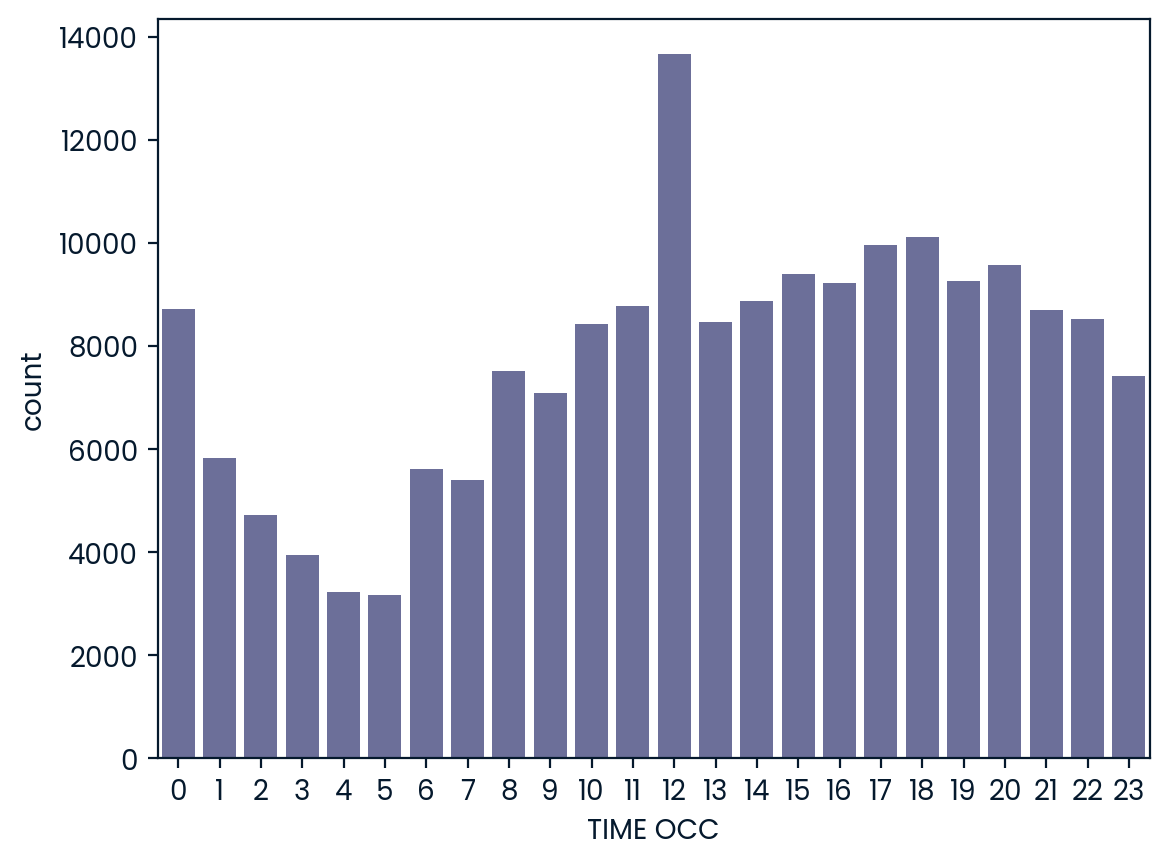

The area with the largest frequency of night crimes is: Central


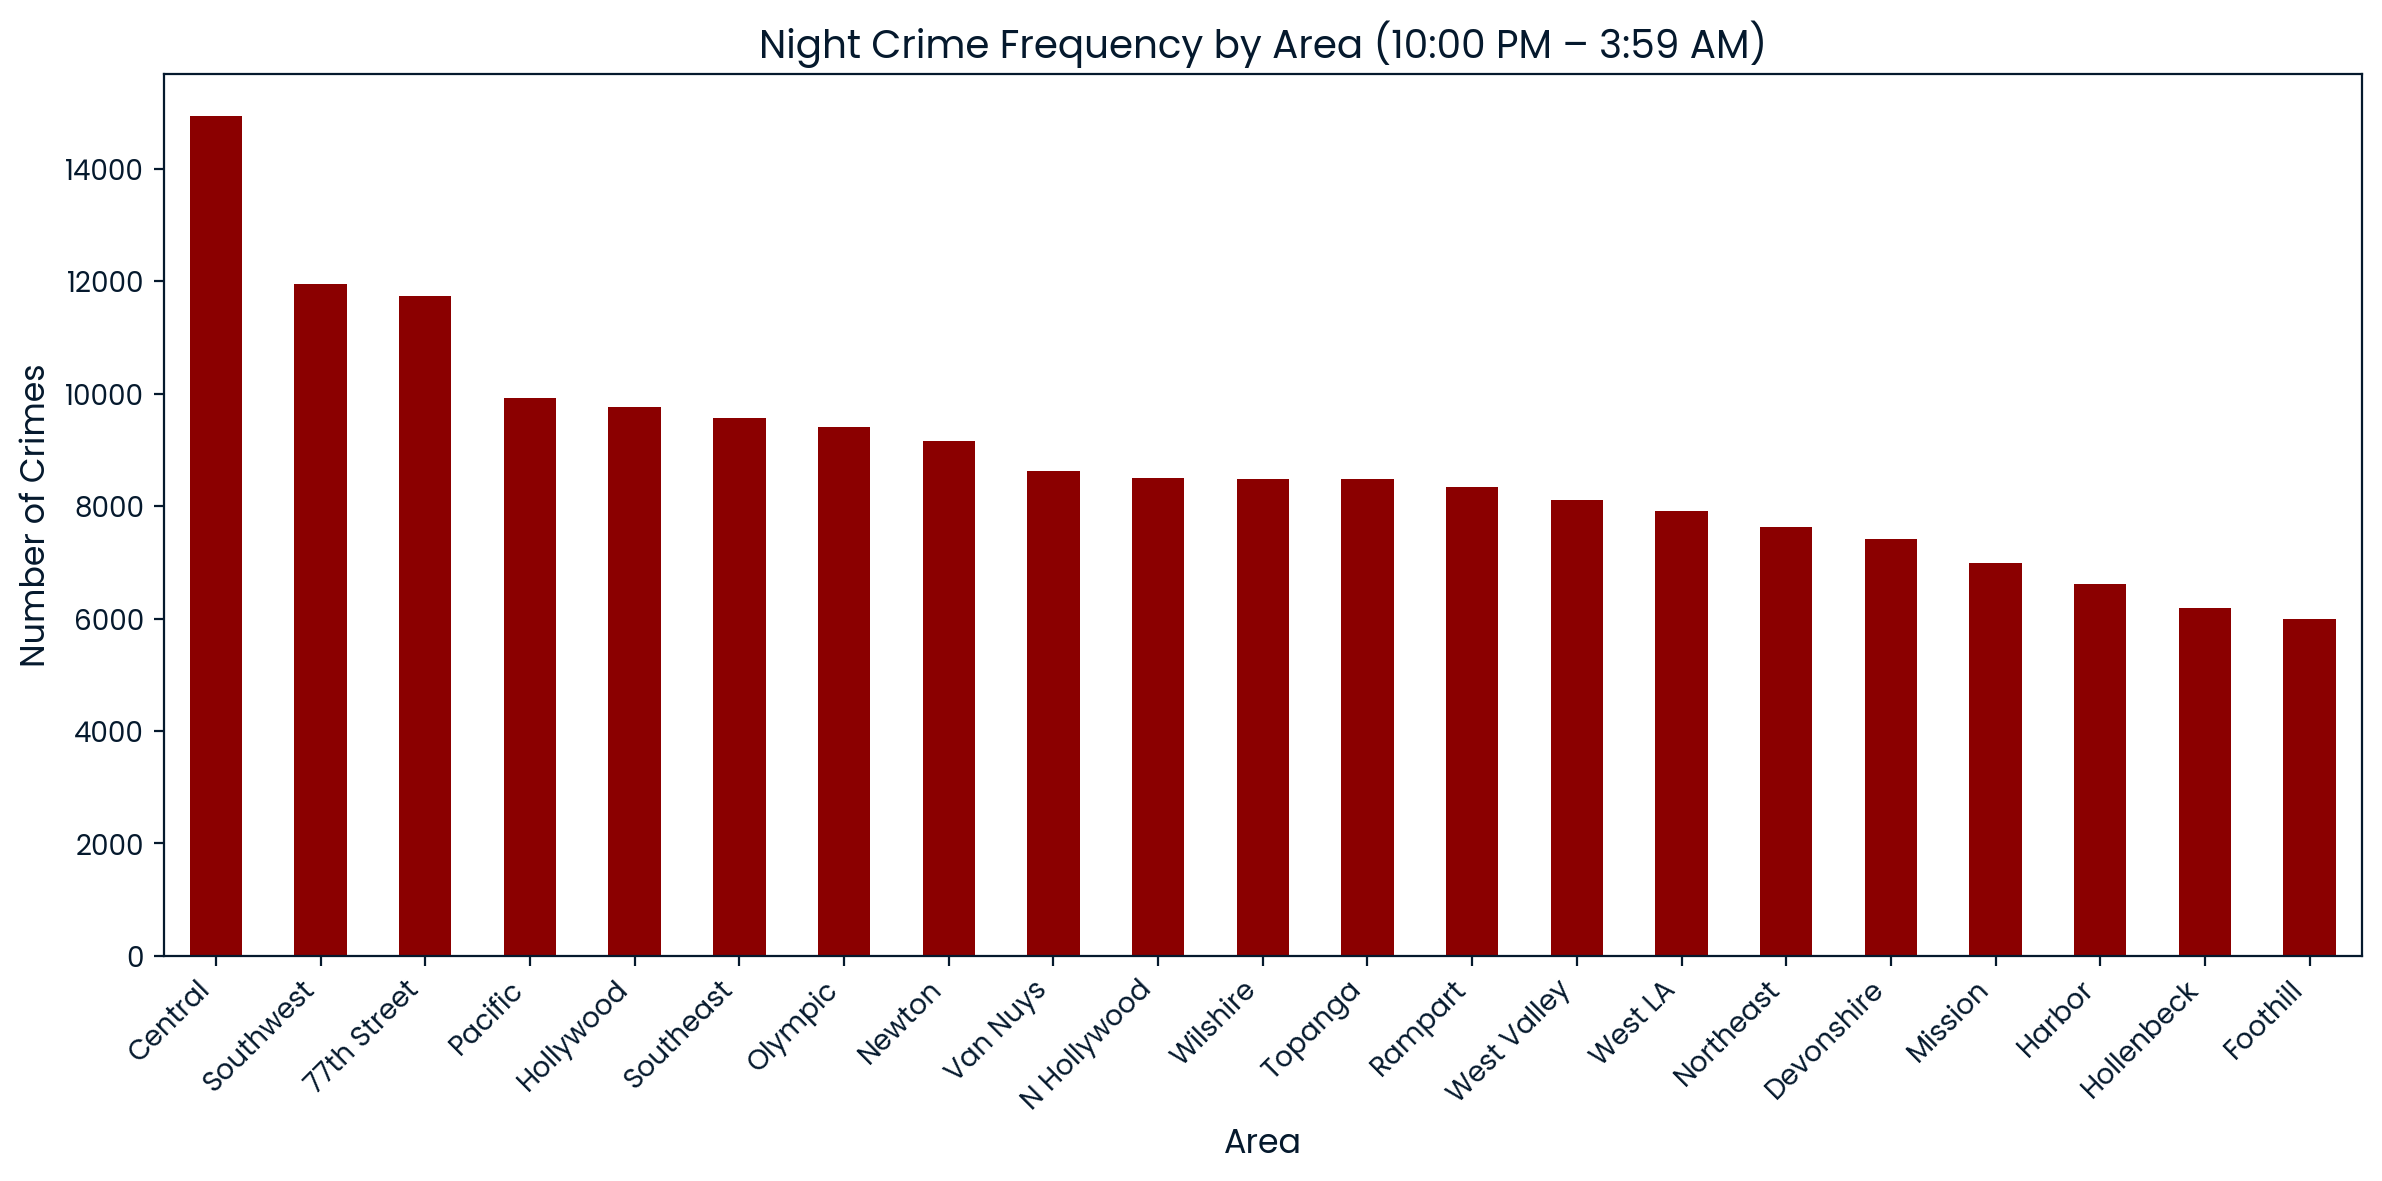

the number of crimes committed against victims of different age groups are: 0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: ranges, dtype: int64


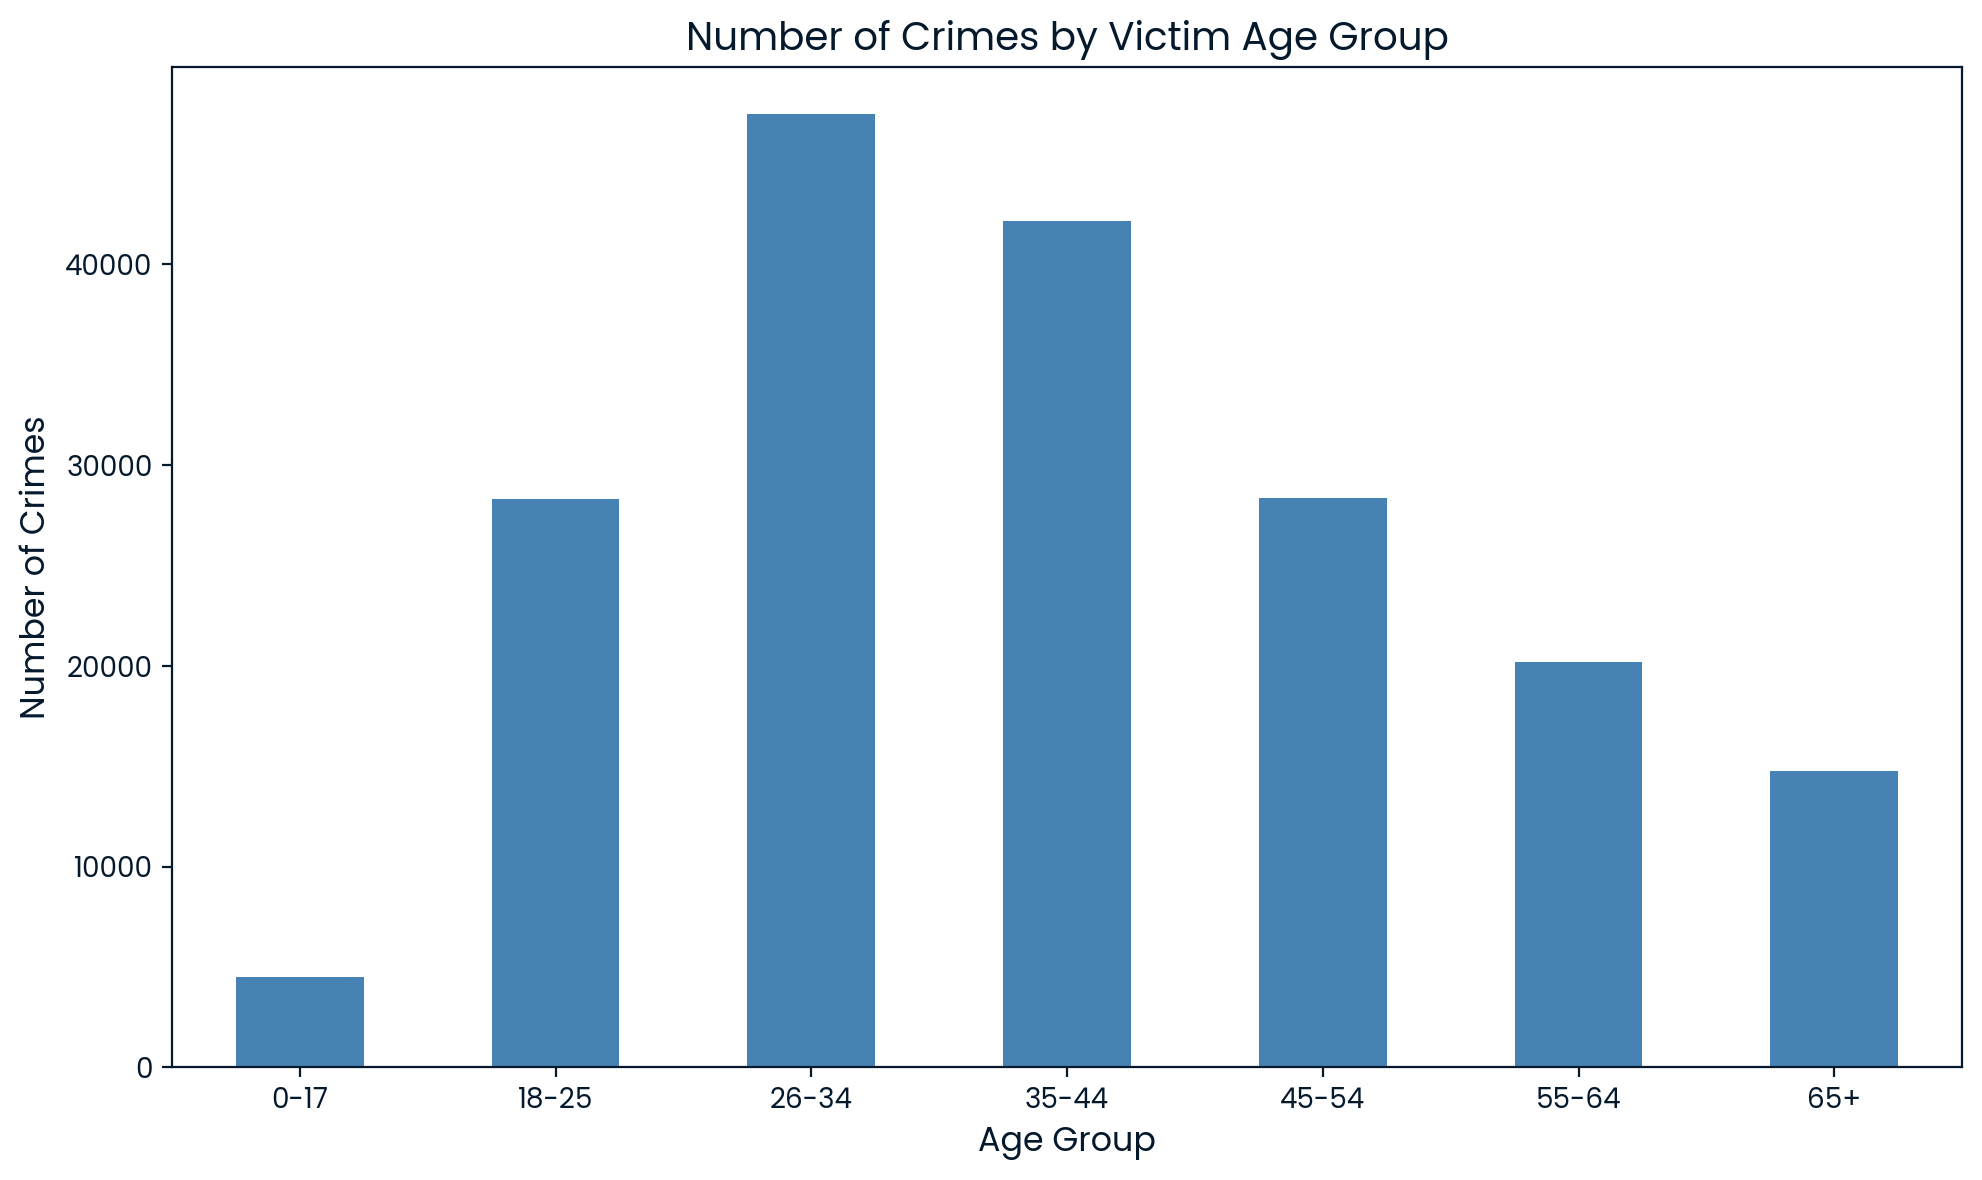

In [27]:


#Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.
crimes['TIME OCC'] = crimes['TIME OCC'].str[:2].astype(int) # It's a error if we don't transform time occ in a INT DataType
crime_hours= crimes['TIME OCC'].value_counts() # count the times that the observation is repered
peak_crime_hour = int(crime_hours.idxmax())# extract the highest one
# Produce a countplot to find the largest frequency of crimes by hour
sns.countplot(data=crimes, x='TIME OCC')

print(f"The highest frequency of crimes are accuring at:{peak_crime_hour}")
plt.show()

#Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.
crimes_2200_to_4000 = crimes[(crimes['TIME OCC'] >= 2200) | (crimes['TIME OCC'] < 4000)] # extraction of relevant data
area_crimes= crimes_2200_to_4000["AREA NAME"].value_counts() # count the times that the observation is repered
peak_night_crime_location= str(area_crimes.idxmax()) # extracting the area
# visualization: 
plt.figure(figsize=(12, 6))
area_crimes.plot(kind='bar', color='darkred')

# Titles and labels
plt.title("Night Crime Frequency by Area (10:00 PM – 3:59 AM)", fontsize=14)
plt.xlabel("Area", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

print(f"The area with the largest frequency of night crimes is: {peak_night_crime_location}")
plt.show()

#Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

bins = [0, 17, 25, 34, 44, 54, 64, 100]  # 
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
crimes["ranges"] = pd.cut(crimes['Vict Age'], bins=bins, labels=labels, right=True, include_lowest=True)
victim_ages = crimes["ranges"].value_counts().sort_index()
#visualization:
plt.figure(figsize=(10, 6))
victim_ages.plot(kind='bar', color='steelblue')

# titles and labels
plt.title("Number of Crimes by Victim Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

print(f'the number of crimes committed against victims of different age groups are: {victim_ages}')
plt.show()